In [2]:
#数据分析和可视化部分
import requests
import numpy as np
from pandas import DataFrame,Series
import json
import pandas as pd

In [14]:
dataDir='/Users/shenxibo/study/python/data tables/zhibo8 players/zhiboplayer_all_2.csv'
data=pd.read_csv(dataDir)
data.head(7)

,id,league_id,league,team_id,team_name,national_team_id,national_team,name,name_en,short_name,...,替补上场,替补下场,出场总时间,黄变红,场均积分,乌龙球,进点球,进球间隔时间,总丢球数,未丢球场次
0,1,24,英超,139,曼城,7,德国,萨内,Leroy Sané,萨内,...,68,83,15554,0,1.91,0,0,263.62,61,18
1,2,59,德甲,222,拜仁慕尼黑,7,德国,托马斯-穆勒,Thomas Müller,穆勒,...,75,175,41374,1,2.25,0,25,187.21,61,18
2,3,24,英超,199,富勒姆,0,NaN,许尔勒,Andre Schurrle,许尔勒,...,99,134,26297,0,1.52,0,6,248.08,61,18
3,4,59,德甲,335,斯图加特,7,德国,戈麦斯,Mario Gomez,戈麦斯,...,126,163,41652,1,1.80,0,18,124.70,61,18
4,5,0,NaN,2570,神户胜利船,0,NaN,波多尔斯基,Lukas Podolski,波多尔斯基,...,81,143,43710,3,1.60,0,1,672.46,61,18
5,7,59,德甲,222,拜仁慕尼黑,7,德国,基米希,Joshua Kimmich,基米希,...,53,51,18428,0,2.21,0,3,682.51,61,18
6,8,59,德甲,223,多特蒙德,0,NaN,魏格尔,Julian Weigl,魏格尔,...,34,34,20087,0,1.74,0,0,2510.87,61,18


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17941 entries, 0 to 17940
Data columns (total 58 columns):
id                      17941 non-null int64
league_id               17941 non-null int64
league                  2719 non-null object
team_id                 17941 non-null int64
team_name               17927 non-null object
national_team_id        17941 non-null int64
national_team           1489 non-null object
name                    17941 non-null object
name_en                 17936 non-null object
short_name              17937 non-null object
short_en                89 non-null object
number                  17941 non-null int64
position                14760 non-null object
nationality             17936 non-null object
age                     17941 non-null int64
height                  17941 non-null object
weight                  17941 non-null object
games_played            17941 non-null int64
playing_time            17941 non-null int64
goal                    17941 

In [29]:
data_history=data[data['season_performace']!='[]']
data_history.describe()

,id,league_id,team_id,national_team_id,number,age,games_played,playing_time,goal,assist,...,替补上场,替补下场,出场总时间,黄变红,场均积分,乌龙球,进点球,进球间隔时间,总丢球数,未丢球场次
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,...,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,7445.994046,31.889974,806.555847,455.744939,17.318409,26.792093,12.987854,959.126935,1.367468,0.924506,...,41.516075,48.409621,19293.375089,0.830674,1.337678,0.422005,2.370326,1398.657714,85.212432,22.397714
std,5260.359872,47.849870,814.375631,1064.122595,15.437909,4.289641,13.238300,1060.026070,3.091429,1.884155,...,37.979429,47.554771,12300.233232,1.470741,0.360003,0.966347,5.959590,2204.040838,95.458534,24.181020
min,1.000000,0.000000,5.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3189.500000,0.000000,225.000000,0.000000,7.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,13.000000,10244.500000,0.000000,1.130000,0.000000,0.000000,360.790000,61.000000,18.000000
50%,7251.000000,24.000000,579.000000,0.000000,15.000000,26.000000,9.000000,579.000000,0.000000,0.000000,...,31.000000,34.000000,17055.000000,0.000000,1.340000,0.000000,0.000000,672.460000,61.000000,18.000000
75%,9947.500000,48.000000,1152.000000,229.000000,23.000000,30.000000,25.000000,1812.500000,1.000000,1.000000,...,60.000000,71.000000,26031.500000,1.000000,1.540000,0.000000,2.000000,1561.010000,61.000000,18.000000
max,22470.000000,725.000000,5583.000000,4216.000000,99.000000,41.000000,46.000000,4140.000000,34.000000,15.000000,...,284.000000,336.000000,86944.000000,17.000000,4.640000,11.000000,99.000000,38590.000000,1051.000000,428.000000


In [40]:
data_history.sort_values(by='出场次数',ascending=False)[:10]

,id,league_id,league,team_id,team_name,national_team_id,national_team,name,name_en,short_name,...,替补上场,替补下场,出场总时间,黄变红,场均积分,乌龙球,进点球,进球间隔时间,总丢球数,未丢球场次
3393,3735,0,NaN,329,莫斯科中央陆军,247,俄罗斯,阿金费耶夫,Igor Akinfeev,阿金费耶夫,...,6.0,5.0,86944.0,0.0,1.74,2.0,1.0,672.46,803,428
1679,1706,0,NaN,2358,洛杉矶银河,2063,蒙特利尔冲击,伊布,Zlatan Ibrahimovic,伊布,...,108.0,189.0,73182.0,4.0,2.39,1.0,99.0,123.40,61,18
6791,7787,80,法甲,931,巴黎圣日耳曼,0,NaN,布冯,Gianluigi Buffon,布冯,...,2.0,12.0,81378.0,0.0,1.87,0.0,1.0,672.46,754,403
3009,3244,80,法甲,931,巴黎圣日耳曼,229,乌拉圭,卡瓦尼,Edinson Cavani,卡瓦尼,...,121.0,224.0,69077.0,2.0,2.92,2.0,69.0,129.11,61,18
3348,3671,48,意甲,567,尤文图斯,249,法国,马图伊迪,Blaise Matuidi,马图伊迪,...,135.0,165.0,66083.0,2.0,3.11,0.0,0.0,836.49,61,18
11859,13558,0,NaN,1273,莫斯科火车头,0,NaN,I.杰尼索夫,Igor Denisov,杰尼索夫,...,83.0,110.0,70621.0,4.0,1.56,0.0,2.0,1238.96,61,18
3377,3712,0,NaN,1460,巴塞尔,257,捷克,M.苏希,Marek Suchy,苏希,...,38.0,28.0,74224.0,5.0,1.49,5.0,0.0,2249.21,61,18
3321,3633,0,NaN,1557,波尔图,0,NaN,卡西利亚斯,Iker Casillas,卡西利亚斯,...,5.0,4.0,77287.0,1.0,1.05,1.0,1.0,672.46,845,325
3358,3686,24,英超,200,狼队,256,葡萄牙,穆蒂尼奥,João Moutinho,穆蒂尼奥,...,80.0,115.0,69681.0,0.0,1.83,0.0,13.0,1106.04,61,18
7216,8322,59,德甲,585,门兴格拉德巴赫,3258,瑞士,索默,Yann Sommer,索默,...,2.0,7.0,75049.0,0.0,1.68,2.0,1.0,672.46,1051,238


In [81]:
d_apper=data_history.sort_values(by='出场次数',ascending=False)[['id','name_en','出场次数']][:10]
d_apper

,id,name_en,出场次数
3393,3735,Igor Akinfeev,970.0
1679,1706,Zlatan Ibrahimovic,931.0
6791,7787,Gianluigi Buffon,907.0
3009,3244,Edinson Cavani,887.0
3348,3671,Blaise Matuidi,874.0
11859,13558,Igor Denisov,868.0
3377,3712,Marek Suchy,862.0
3321,3633,Iker Casillas,861.0
3358,3686,João Moutinho,856.0
7216,8322,Yann Sommer,836.0


In [82]:
ds_apper=d_apper
ds_apper.index=ds_apper.name_en
ds_apper

,id,name_en,出场次数
name_en,,,
Igor Akinfeev,3735,Igor Akinfeev,970.0
Zlatan Ibrahimovic,1706,Zlatan Ibrahimovic,931.0
Gianluigi Buffon,7787,Gianluigi Buffon,907.0
Edinson Cavani,3244,Edinson Cavani,887.0
Blaise Matuidi,3671,Blaise Matuidi,874.0
Igor Denisov,13558,Igor Denisov,868.0
Marek Suchy,3712,Marek Suchy,862.0
Iker Casillas,3633,Iker Casillas,861.0
João Moutinho,3686,João Moutinho,856.0


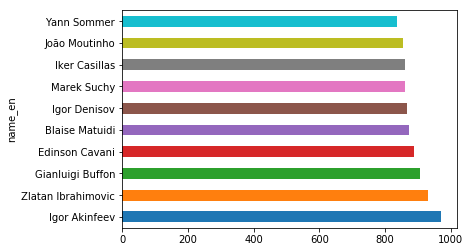

In [83]:
ds_apper.出场次数.plot.barh()

In [85]:

def clean(season):
    if season=='[]':
        return 'fuckyou'

data['test']=data['season_performace'].apply(clean)



In [101]:
d_eff=data_history.sort_values(by='进球',ascending=False)[['id','name_en','进球','出场次数']][:20]
d_eff['efficiency']=d_eff['进球']/d_eff['出场次数']

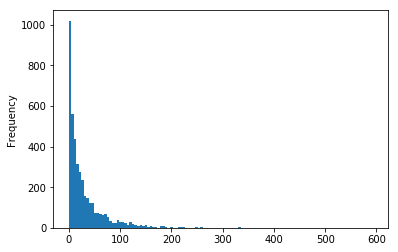

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_history['进球'].plot.hist(bins=120)

In [102]:
d_eff

,id,name_en,进球,出场次数,efficiency
1679,1706,Zlatan Ibrahimovic,593.0,931.0,0.636950
2208,2289,Cristiano Ronaldo,583.0,779.0,0.748395
53,57,Lionel Messi,569.0,654.0,0.870031
3009,3244,Edinson Cavani,535.0,887.0,0.603157
3012,3247,Luis Suárez,391.0,568.0,0.688380
8878,10175,Radamel Falcao Garcí,377.0,660.0,0.571212
54,58,Sergio Agüero,371.0,650.0,0.570769
15275,18150,Leigh Griffiths,370.0,739.0,0.500677
842,854,Neymar da Silva Sant,349.0,633.0,0.551343
2207,2288,Karim Benzema,335.0,730.0,0.458904


In [59]:
player['vs_teams']

[{'id': '59714',
  'vs_team_id': '665',
  'vs_team': '奥格斯堡',
  'player_id': '25',
  'player': '菲尔米诺',
  'times': '11',
  'win': '5',
  'draw': '3',
  'lose': '3',
  'goal': '1',
  'assist': '2',
  'yellow': '2',
  'red': '0',
  'yellow_to_red': '0',
  'is_keeper': '0'},
 {'id': '59726',
  'vs_team_id': '139',
  'vs_team': '曼城',
  'player_id': '25',
  'player': '菲尔米诺',
  'times': '10',
  'win': '6',
  'draw': '2',
  'lose': '2',
  'goal': '4',
  'assist': '5',
  'yellow': '3',
  'red': '0',
  'yellow_to_red': '0',
  'is_keeper': '0'},
 {'id': '59715',
  'vs_team_id': '587',
  'vs_team': '沃尔夫斯堡',
  'player_id': '25',
  'player': '菲尔米诺',
  'times': '10',
  'win': '3',
  'draw': '2',
  'lose': '5',
  'goal': '7',
  'assist': '1',
  'yellow': '4',
  'red': '0',
  'yellow_to_red': '0',
  'is_keeper': '0'}]

In [82]:
url='https://db.qiumibao.com/f/index/player?pid='
a=1
for i in range(25000):
    if r:
        a=a+1
        r=requests.get(url+str(i+1),verify=False)
        print(i,'--- ',a,'--- ',r.headers)

/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


0 ---  2 ---  {'Date': 'Fri, 23 Nov 2018 06:53:05 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


1 ---  3 ---  {'Date': 'Fri, 23 Nov 2018 06:53:05 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2 ---  4 ---  {'Date': 'Fri, 23 Nov 2018 06:53:05 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


3 ---  5 ---  {'Date': 'Fri, 23 Nov 2018 06:53:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


4 ---  6 ---  {'Date': 'Fri, 23 Nov 2018 06:53:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
5 ---  7 ---  {'Date': 'Fri, 23 Nov 2018 06:53:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


6 ---  8 ---  {'Date': 'Fri, 23 Nov 2018 06:53:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


7 ---  9 ---  {'Date': 'Fri, 23 Nov 2018 06:53:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


8 ---  10 ---  {'Date': 'Fri, 23 Nov 2018 06:53:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


9 ---  11 ---  {'Date': 'Fri, 23 Nov 2018 06:53:08 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


10 ---  12 ---  {'Date': 'Fri, 23 Nov 2018 06:53:08 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


11 ---  13 ---  {'Date': 'Fri, 23 Nov 2018 06:53:08 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


12 ---  14 ---  {'Date': 'Fri, 23 Nov 2018 06:53:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


13 ---  15 ---  {'Date': 'Fri, 23 Nov 2018 06:53:10 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


14 ---  16 ---  {'Date': 'Fri, 23 Nov 2018 06:53:10 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


15 ---  17 ---  {'Date': 'Fri, 23 Nov 2018 06:53:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


16 ---  18 ---  {'Date': 'Fri, 23 Nov 2018 06:53:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


17 ---  19 ---  {'Date': 'Fri, 23 Nov 2018 06:53:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


18 ---  20 ---  {'Date': 'Fri, 23 Nov 2018 06:53:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


19 ---  21 ---  {'Date': 'Fri, 23 Nov 2018 06:53:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


20 ---  22 ---  {'Date': 'Fri, 23 Nov 2018 06:53:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


21 ---  23 ---  {'Date': 'Fri, 23 Nov 2018 06:53:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


22 ---  24 ---  {'Date': 'Fri, 23 Nov 2018 06:53:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


23 ---  25 ---  {'Date': 'Fri, 23 Nov 2018 06:53:14 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


24 ---  26 ---  {'Date': 'Fri, 23 Nov 2018 06:53:14 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


25 ---  27 ---  {'Date': 'Fri, 23 Nov 2018 06:53:14 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


26 ---  28 ---  {'Date': 'Fri, 23 Nov 2018 06:53:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


27 ---  29 ---  {'Date': 'Fri, 23 Nov 2018 06:53:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


28 ---  30 ---  {'Date': 'Fri, 23 Nov 2018 06:53:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


29 ---  31 ---  {'Date': 'Fri, 23 Nov 2018 06:53:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
30 ---  32 ---  {'Date': 'Fri, 23 Nov 2018 06:53:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


31 ---  33 ---  {'Date': 'Fri, 23 Nov 2018 06:53:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


32 ---  34 ---  {'Date': 'Fri, 23 Nov 2018 06:53:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


33 ---  35 ---  {'Date': 'Fri, 23 Nov 2018 06:53:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


34 ---  36 ---  {'Date': 'Fri, 23 Nov 2018 06:53:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
35 ---  37 ---  {'Date': 'Fri, 23 Nov 2018 06:53:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


36 ---  38 ---  {'Date': 'Fri, 23 Nov 2018 06:53:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


37 ---  39 ---  {'Date': 'Fri, 23 Nov 2018 06:53:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


38 ---  40 ---  {'Date': 'Fri, 23 Nov 2018 06:53:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


39 ---  41 ---  {'Date': 'Fri, 23 Nov 2018 06:53:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


40 ---  42 ---  {'Date': 'Fri, 23 Nov 2018 06:53:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


41 ---  43 ---  {'Date': 'Fri, 23 Nov 2018 06:53:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


42 ---  44 ---  {'Date': 'Fri, 23 Nov 2018 06:53:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


43 ---  45 ---  {'Date': 'Fri, 23 Nov 2018 06:53:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


44 ---  46 ---  {'Date': 'Fri, 23 Nov 2018 06:53:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


45 ---  47 ---  {'Date': 'Fri, 23 Nov 2018 06:53:21 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


46 ---  48 ---  {'Date': 'Fri, 23 Nov 2018 06:53:21 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


47 ---  49 ---  {'Date': 'Fri, 23 Nov 2018 06:53:22 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


48 ---  50 ---  {'Date': 'Fri, 23 Nov 2018 06:53:22 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


49 ---  51 ---  {'Date': 'Fri, 23 Nov 2018 06:53:22 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


50 ---  52 ---  {'Date': 'Fri, 23 Nov 2018 06:53:23 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


51 ---  53 ---  {'Date': 'Fri, 23 Nov 2018 06:53:23 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


52 ---  54 ---  {'Date': 'Fri, 23 Nov 2018 06:53:23 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


53 ---  55 ---  {'Date': 'Fri, 23 Nov 2018 06:53:24 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


54 ---  56 ---  {'Date': 'Fri, 23 Nov 2018 06:53:24 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


55 ---  57 ---  {'Date': 'Fri, 23 Nov 2018 06:53:25 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


56 ---  58 ---  {'Date': 'Fri, 23 Nov 2018 06:53:25 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


57 ---  59 ---  {'Date': 'Fri, 23 Nov 2018 06:53:26 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


58 ---  60 ---  {'Date': 'Fri, 23 Nov 2018 06:53:26 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


59 ---  61 ---  {'Date': 'Fri, 23 Nov 2018 06:53:27 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


60 ---  62 ---  {'Date': 'Fri, 23 Nov 2018 06:53:27 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


61 ---  63 ---  {'Date': 'Fri, 23 Nov 2018 06:53:28 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


62 ---  64 ---  {'Date': 'Fri, 23 Nov 2018 06:53:28 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


63 ---  65 ---  {'Date': 'Fri, 23 Nov 2018 06:53:29 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


64 ---  66 ---  {'Date': 'Fri, 23 Nov 2018 06:53:29 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


65 ---  67 ---  {'Date': 'Fri, 23 Nov 2018 06:53:29 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


66 ---  68 ---  {'Date': 'Fri, 23 Nov 2018 06:53:31 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


67 ---  69 ---  {'Date': 'Fri, 23 Nov 2018 06:53:32 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


68 ---  70 ---  {'Date': 'Fri, 23 Nov 2018 06:53:33 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


69 ---  71 ---  {'Date': 'Fri, 23 Nov 2018 06:53:33 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


70 ---  72 ---  {'Date': 'Fri, 23 Nov 2018 06:53:34 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


71 ---  73 ---  {'Date': 'Fri, 23 Nov 2018 06:53:34 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


72 ---  74 ---  {'Date': 'Fri, 23 Nov 2018 06:53:34 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


73 ---  75 ---  {'Date': 'Fri, 23 Nov 2018 06:53:35 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


74 ---  76 ---  {'Date': 'Fri, 23 Nov 2018 06:53:35 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


75 ---  77 ---  {'Date': 'Fri, 23 Nov 2018 06:53:36 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


76 ---  78 ---  {'Date': 'Fri, 23 Nov 2018 06:53:36 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


77 ---  79 ---  {'Date': 'Fri, 23 Nov 2018 06:53:36 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


78 ---  80 ---  {'Date': 'Fri, 23 Nov 2018 06:53:37 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


79 ---  81 ---  {'Date': 'Fri, 23 Nov 2018 06:53:38 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
80 ---  82 ---  {'Date': 'Fri, 23 Nov 2018 06:53:38 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


81 ---  83 ---  {'Date': 'Fri, 23 Nov 2018 06:53:38 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


82 ---  84 ---  {'Date': 'Fri, 23 Nov 2018 06:53:39 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


83 ---  85 ---  {'Date': 'Fri, 23 Nov 2018 06:53:39 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


84 ---  86 ---  {'Date': 'Fri, 23 Nov 2018 06:53:39 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


85 ---  87 ---  {'Date': 'Fri, 23 Nov 2018 06:53:40 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


86 ---  88 ---  {'Date': 'Fri, 23 Nov 2018 06:53:40 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


87 ---  89 ---  {'Date': 'Fri, 23 Nov 2018 06:53:40 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


88 ---  90 ---  {'Date': 'Fri, 23 Nov 2018 06:53:41 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


89 ---  91 ---  {'Date': 'Fri, 23 Nov 2018 06:53:41 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
90 ---  92 ---  {'Date': 'Fri, 23 Nov 2018 06:53:42 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


91 ---  93 ---  {'Date': 'Fri, 23 Nov 2018 06:53:42 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


92 ---  94 ---  {'Date': 'Fri, 23 Nov 2018 06:53:42 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


93 ---  95 ---  {'Date': 'Fri, 23 Nov 2018 06:53:43 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


94 ---  96 ---  {'Date': 'Fri, 23 Nov 2018 06:53:43 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


95 ---  97 ---  {'Date': 'Fri, 23 Nov 2018 06:53:43 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


96 ---  98 ---  {'Date': 'Fri, 23 Nov 2018 06:53:43 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


97 ---  99 ---  {'Date': 'Fri, 23 Nov 2018 06:53:44 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


98 ---  100 ---  {'Date': 'Fri, 23 Nov 2018 06:53:44 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
99 ---  101 ---  {'Date': 'Fri, 23 Nov 2018 06:53:45 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


100 ---  102 ---  {'Date': 'Fri, 23 Nov 2018 06:53:45 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


101 ---  103 ---  {'Date': 'Fri, 23 Nov 2018 06:53:45 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


102 ---  104 ---  {'Date': 'Fri, 23 Nov 2018 06:53:46 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
103 ---  105 ---  {'Date': 'Fri, 23 Nov 2018 06:53:46 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


104 ---  106 ---  {'Date': 'Fri, 23 Nov 2018 06:53:46 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
105 ---  107 ---  {'Date': 'Fri, 23 Nov 2018 06:53:46 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


106 ---  108 ---  {'Date': 'Fri, 23 Nov 2018 06:53:46 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


107 ---  109 ---  {'Date': 'Fri, 23 Nov 2018 06:53:47 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


108 ---  110 ---  {'Date': 'Fri, 23 Nov 2018 06:53:47 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


109 ---  111 ---  {'Date': 'Fri, 23 Nov 2018 06:53:47 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


110 ---  112 ---  {'Date': 'Fri, 23 Nov 2018 06:53:47 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


111 ---  113 ---  {'Date': 'Fri, 23 Nov 2018 06:53:48 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


112 ---  114 ---  {'Date': 'Fri, 23 Nov 2018 06:53:48 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


113 ---  115 ---  {'Date': 'Fri, 23 Nov 2018 06:53:48 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


114 ---  116 ---  {'Date': 'Fri, 23 Nov 2018 06:53:49 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


115 ---  117 ---  {'Date': 'Fri, 23 Nov 2018 06:53:49 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


116 ---  118 ---  {'Date': 'Fri, 23 Nov 2018 06:53:49 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


117 ---  119 ---  {'Date': 'Fri, 23 Nov 2018 06:53:49 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


118 ---  120 ---  {'Date': 'Fri, 23 Nov 2018 06:53:50 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


119 ---  121 ---  {'Date': 'Fri, 23 Nov 2018 06:53:50 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


120 ---  122 ---  {'Date': 'Fri, 23 Nov 2018 06:53:50 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


121 ---  123 ---  {'Date': 'Fri, 23 Nov 2018 06:53:51 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


122 ---  124 ---  {'Date': 'Fri, 23 Nov 2018 06:53:51 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


123 ---  125 ---  {'Date': 'Fri, 23 Nov 2018 06:53:51 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


124 ---  126 ---  {'Date': 'Fri, 23 Nov 2018 06:53:52 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


125 ---  127 ---  {'Date': 'Fri, 23 Nov 2018 06:53:52 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


126 ---  128 ---  {'Date': 'Fri, 23 Nov 2018 06:53:52 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


127 ---  129 ---  {'Date': 'Fri, 23 Nov 2018 06:53:52 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


128 ---  130 ---  {'Date': 'Fri, 23 Nov 2018 06:53:53 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


129 ---  131 ---  {'Date': 'Fri, 23 Nov 2018 06:53:53 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


130 ---  132 ---  {'Date': 'Fri, 23 Nov 2018 06:53:53 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


131 ---  133 ---  {'Date': 'Fri, 23 Nov 2018 06:53:54 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


132 ---  134 ---  {'Date': 'Fri, 23 Nov 2018 06:53:54 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


133 ---  135 ---  {'Date': 'Fri, 23 Nov 2018 06:53:54 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


134 ---  136 ---  {'Date': 'Fri, 23 Nov 2018 06:53:55 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


135 ---  137 ---  {'Date': 'Fri, 23 Nov 2018 06:53:55 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


136 ---  138 ---  {'Date': 'Fri, 23 Nov 2018 06:53:55 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


137 ---  139 ---  {'Date': 'Fri, 23 Nov 2018 06:53:56 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


138 ---  140 ---  {'Date': 'Fri, 23 Nov 2018 06:53:56 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


139 ---  141 ---  {'Date': 'Fri, 23 Nov 2018 06:53:56 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


140 ---  142 ---  {'Date': 'Fri, 23 Nov 2018 06:53:56 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


141 ---  143 ---  {'Date': 'Fri, 23 Nov 2018 06:53:57 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


142 ---  144 ---  {'Date': 'Fri, 23 Nov 2018 06:53:57 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


143 ---  145 ---  {'Date': 'Fri, 23 Nov 2018 06:53:57 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


144 ---  146 ---  {'Date': 'Fri, 23 Nov 2018 06:53:58 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


145 ---  147 ---  {'Date': 'Fri, 23 Nov 2018 06:53:58 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


146 ---  148 ---  {'Date': 'Fri, 23 Nov 2018 06:53:58 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


147 ---  149 ---  {'Date': 'Fri, 23 Nov 2018 06:53:59 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


148 ---  150 ---  {'Date': 'Fri, 23 Nov 2018 06:53:59 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


149 ---  151 ---  {'Date': 'Fri, 23 Nov 2018 06:53:59 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


150 ---  152 ---  {'Date': 'Fri, 23 Nov 2018 06:53:59 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


151 ---  153 ---  {'Date': 'Fri, 23 Nov 2018 06:54:00 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


152 ---  154 ---  {'Date': 'Fri, 23 Nov 2018 06:54:00 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


153 ---  155 ---  {'Date': 'Fri, 23 Nov 2018 06:54:00 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


154 ---  156 ---  {'Date': 'Fri, 23 Nov 2018 06:54:01 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


155 ---  157 ---  {'Date': 'Fri, 23 Nov 2018 06:54:01 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


156 ---  158 ---  {'Date': 'Fri, 23 Nov 2018 06:54:01 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


157 ---  159 ---  {'Date': 'Fri, 23 Nov 2018 06:54:02 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


158 ---  160 ---  {'Date': 'Fri, 23 Nov 2018 06:54:02 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


159 ---  161 ---  {'Date': 'Fri, 23 Nov 2018 06:54:03 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


160 ---  162 ---  {'Date': 'Fri, 23 Nov 2018 06:54:04 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


161 ---  163 ---  {'Date': 'Fri, 23 Nov 2018 06:54:04 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


162 ---  164 ---  {'Date': 'Fri, 23 Nov 2018 06:54:05 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


163 ---  165 ---  {'Date': 'Fri, 23 Nov 2018 06:54:05 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


164 ---  166 ---  {'Date': 'Fri, 23 Nov 2018 06:54:05 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


165 ---  167 ---  {'Date': 'Fri, 23 Nov 2018 06:54:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


166 ---  168 ---  {'Date': 'Fri, 23 Nov 2018 06:54:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


167 ---  169 ---  {'Date': 'Fri, 23 Nov 2018 06:54:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


168 ---  170 ---  {'Date': 'Fri, 23 Nov 2018 06:54:06 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


169 ---  171 ---  {'Date': 'Fri, 23 Nov 2018 06:54:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


170 ---  172 ---  {'Date': 'Fri, 23 Nov 2018 06:54:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


171 ---  173 ---  {'Date': 'Fri, 23 Nov 2018 06:54:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


172 ---  174 ---  {'Date': 'Fri, 23 Nov 2018 06:54:07 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


173 ---  175 ---  {'Date': 'Fri, 23 Nov 2018 06:54:08 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


174 ---  176 ---  {'Date': 'Fri, 23 Nov 2018 06:54:08 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


175 ---  177 ---  {'Date': 'Fri, 23 Nov 2018 06:54:08 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


176 ---  178 ---  {'Date': 'Fri, 23 Nov 2018 06:54:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


177 ---  179 ---  {'Date': 'Fri, 23 Nov 2018 06:54:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


178 ---  180 ---  {'Date': 'Fri, 23 Nov 2018 06:54:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


179 ---  181 ---  {'Date': 'Fri, 23 Nov 2018 06:54:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


180 ---  182 ---  {'Date': 'Fri, 23 Nov 2018 06:54:10 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


181 ---  183 ---  {'Date': 'Fri, 23 Nov 2018 06:54:10 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
182 ---  184 ---  {'Date': 'Fri, 23 Nov 2018 06:54:10 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


183 ---  185 ---  {'Date': 'Fri, 23 Nov 2018 06:54:10 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


184 ---  186 ---  {'Date': 'Fri, 23 Nov 2018 06:54:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
185 ---  187 ---  {'Date': 'Fri, 23 Nov 2018 06:54:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


186 ---  188 ---  {'Date': 'Fri, 23 Nov 2018 06:54:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
187 ---  189 ---  {'Date': 'Fri, 23 Nov 2018 06:54:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


188 ---  190 ---  {'Date': 'Fri, 23 Nov 2018 06:54:11 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
189 ---  191 ---  {'Date': 'Fri, 23 Nov 2018 06:54:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


190 ---  192 ---  {'Date': 'Fri, 23 Nov 2018 06:54:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


191 ---  193 ---  {'Date': 'Fri, 23 Nov 2018 06:54:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
192 ---  194 ---  {'Date': 'Fri, 23 Nov 2018 06:54:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


193 ---  195 ---  {'Date': 'Fri, 23 Nov 2018 06:54:12 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


194 ---  196 ---  {'Date': 'Fri, 23 Nov 2018 06:54:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


195 ---  197 ---  {'Date': 'Fri, 23 Nov 2018 06:54:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
196 ---  198 ---  {'Date': 'Fri, 23 Nov 2018 06:54:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


197 ---  199 ---  {'Date': 'Fri, 23 Nov 2018 06:54:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
198 ---  200 ---  {'Date': 'Fri, 23 Nov 2018 06:54:13 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


199 ---  201 ---  {'Date': 'Fri, 23 Nov 2018 06:54:14 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


200 ---  202 ---  {'Date': 'Fri, 23 Nov 2018 06:54:14 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


201 ---  203 ---  {'Date': 'Fri, 23 Nov 2018 06:54:14 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


202 ---  204 ---  {'Date': 'Fri, 23 Nov 2018 06:54:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


203 ---  205 ---  {'Date': 'Fri, 23 Nov 2018 06:54:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


204 ---  206 ---  {'Date': 'Fri, 23 Nov 2018 06:54:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
205 ---  207 ---  {'Date': 'Fri, 23 Nov 2018 06:54:15 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


206 ---  208 ---  {'Date': 'Fri, 23 Nov 2018 06:54:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
207 ---  209 ---  {'Date': 'Fri, 23 Nov 2018 06:54:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


208 ---  210 ---  {'Date': 'Fri, 23 Nov 2018 06:54:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
209 ---  211 ---  {'Date': 'Fri, 23 Nov 2018 06:54:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


210 ---  212 ---  {'Date': 'Fri, 23 Nov 2018 06:54:16 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
211 ---  213 ---  {'Date': 'Fri, 23 Nov 2018 06:54:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


212 ---  214 ---  {'Date': 'Fri, 23 Nov 2018 06:54:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
213 ---  215 ---  {'Date': 'Fri, 23 Nov 2018 06:54:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


214 ---  216 ---  {'Date': 'Fri, 23 Nov 2018 06:54:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
215 ---  217 ---  {'Date': 'Fri, 23 Nov 2018 06:54:17 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


216 ---  218 ---  {'Date': 'Fri, 23 Nov 2018 06:54:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


217 ---  219 ---  {'Date': 'Fri, 23 Nov 2018 06:54:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
218 ---  220 ---  {'Date': 'Fri, 23 Nov 2018 06:54:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


219 ---  221 ---  {'Date': 'Fri, 23 Nov 2018 06:54:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
220 ---  222 ---  {'Date': 'Fri, 23 Nov 2018 06:54:18 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


221 ---  223 ---  {'Date': 'Fri, 23 Nov 2018 06:54:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
222 ---  224 ---  {'Date': 'Fri, 23 Nov 2018 06:54:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


223 ---  225 ---  {'Date': 'Fri, 23 Nov 2018 06:54:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
224 ---  226 ---  {'Date': 'Fri, 23 Nov 2018 06:54:19 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


225 ---  227 ---  {'Date': 'Fri, 23 Nov 2018 06:54:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
226 ---  228 ---  {'Date': 'Fri, 23 Nov 2018 06:54:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


227 ---  229 ---  {'Date': 'Fri, 23 Nov 2018 06:54:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
228 ---  230 ---  {'Date': 'Fri, 23 Nov 2018 06:54:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


229 ---  231 ---  {'Date': 'Fri, 23 Nov 2018 06:54:20 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}
230 ---  232 ---  {'Date': 'Fri, 23 Nov 2018 06:54:21 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


231 ---  233 ---  {'Date': 'Fri, 23 Nov 2018 06:54:21 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


232 ---  234 ---  {'Date': 'Fri, 23 Nov 2018 06:54:21 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


233 ---  235 ---  {'Date': 'Fri, 23 Nov 2018 06:54:22 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


234 ---  236 ---  {'Date': 'Fri, 23 Nov 2018 06:54:22 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


235 ---  237 ---  {'Date': 'Fri, 23 Nov 2018 06:54:22 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


236 ---  238 ---  {'Date': 'Fri, 23 Nov 2018 06:54:23 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


237 ---  239 ---  {'Date': 'Fri, 23 Nov 2018 06:54:24 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


238 ---  240 ---  {'Date': 'Fri, 23 Nov 2018 06:54:24 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


/Users/shenxibo/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


239 ---  241 ---  {'Date': 'Fri, 23 Nov 2018 06:54:26 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}


KeyboardInterrupt: 

In [76]:
def write_into_file(content):
    with open('/Users/shenxibo/study/python/data tables/zhibo8 players/zhiboplayer.csv', 'a', encoding='gbk') as f:
        f.write(json.dumps(content, ensure_ascii=False) + '\n')
write_into_file('直播吧球员')

In [73]:
r=requests.get(url+'1307')
r.headers

{'Date': 'Fri, 23 Nov 2018 06:01:35 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/5.6.14', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS', 'Content-Encoding': 'gzip'}

In [80]:
data=r.json().values()
#write_into_file(data)  r=requests.get(url+str(i+1),verify=False)
data

dict_values(['1307', '19', '英乙', '136', '克鲁', '0', '', '尼科尔斯', 'Alex Nicholls', '尼科尔斯', '', '14', '前锋', '英格兰', '31', '178', '70', '0', '0', '0', '0', '0', '0', '0.00', '1987-12-09', '右脚', '0000-00-00 00:00:00', '2019-06-30 00:00:00', 'http://xinwentu.oss-cn-hangzhou.aliyuncs.com/avatar/default-avatar.png', '1', '0', '0', '0', [], [{'id': '164760', 'player_id': '1307', 'from_team_id': '97', 'to_team_id': '136', 'name': '尼科尔斯', 'from_team_name': '巴尼特', 'to_team_name': '克鲁', 'type': '1', 'tran_time': '2018-07-06 00:00:00', 'value': '-', 'at_the_time_value': '25', 'season': '18/19', 'update_time': '1542556846'}, {'id': '164761', 'player_id': '1307', 'from_team_id': '1860', 'to_team_id': '97', 'name': '尼科尔斯', 'from_team_name': '邓迪联', 'to_team_name': '巴尼特', 'type': '3', 'tran_time': '2017-05-31 00:00:00', 'value': '-', 'at_the_time_value': '25', 'season': '16/17', 'update_time': '1542556846'}, {'id': '164762', 'player_id': '1307', 'from_team_id': '97', 'to_team_id': '1860', 'name': '尼科尔斯', '

In [87]:
url='https://db.qiumibao.com/f/index/player?pid='
r=requests.get(url+'1')
s=Series(r.json())
for i in range(19510,22474):
    r=requests.get(url+str(i+1))
    if r.json():
        sp=Series(r.json())
        sp['read_card']=''
        data.loc[i]=sp.values
        print(i,'  ',data.loc[i]['name'])

19510    卡兰萨
19511    迪奥塞斯
19512    富恩特斯
19513    罗纳尔·乌亚查
19514    马查华伊
19515    奥赫达
19516    杰雷米·萨尔斯
19517    维拉尔德
19518    瓦斯奎斯
19519    萨拉斯
19520    法尔科尼
19521    梅纳.莫斯克拉
19522    哈伊尔·伊格尔希亚斯
19523    科尔多瓦
19524    蒙特希诺斯
19525    基纳
19526    瓦斯奎斯
19527    比略斯拉达
19528    梅纳
19529    奥多涅斯
19530    萨穆迪奥
19531    阿劳霍
19532    比达莱斯
19533    达尼洛·卡兰多
19534    乌加里萨
19535    蒂托
19536    阿伦卡斯特雷
19537    阿尼卡玛
19538    阿罗埃
19539    奥克卡
19540    卡帕奇卡
19541    勒卡罗斯
19542    拉穆亚
19543    雷塔莫索
19544    罗哈斯
19545    哈拉里奥
19546    里瓦斯
19547    维拉斯奎兹
19548    埃雷拉
19549    康托吉安尼斯
19550    洛加斯
19551    塞巴斯蒂安·罗哈斯
19552    圣地兰
19553    塞拉诺
19554    瓦尔维德
19555    卢卡纳
19556    西乌奇
19557    达维拉
19558    奥蒂兹
19559    鲁伊斯
19560    梅迪纳
19561    巴勃罗·迪奥戈·洛佩斯·德·利马
19562    奇科
19563    马里昂
19564    鲁道夫
19565    廷加
19566    埃尔维斯·维埃拉
19567    尤里·纳维斯·罗伯特
19568    达尼洛·皮雷斯
19569    汤尼
19570    阿德里亚诺
19571    埃德森·拉莫斯·席尔瓦
19572    博特略
19573    埃德森·科隆
19574    塞利斯
19575    阿吉雷
19576    蒙特内戈罗
19577    博尔格斯
19578    穆希卡
19579

20539    费尔南德斯
20540    冈萨雷斯
20541    阿吉拉尔
20542    雷斯
20543    威廉·加雷
20544    考尔曼
20545    阿基诺
20546    马科斯.里贝罗斯
20547    罗德里戈.罗哈斯
20548    西尔维奥·加布里埃尔·托拉雷斯·吉梅内斯
20549    罗哈斯
20550    亚历克西斯-冈萨雷斯
20551    佛朗哥
20552    希门尼斯
20553    吉伦
20554    卡塞拉斯
20555    卡塞雷斯
20556    摩利纳
20557    艾拉沙巴尔
20558    维拉斯克.莫斯
20559    柏拉斯
20560    特奥多罗·帕文
20561    卡诺
20562    迪翁
20563    乌利安夫尔
20564    卡洛斯·努涅斯
20565    马林
20566    洛佩兹
20567    加马拉
20568    贝特安
20569    雷耶斯
20570    莫雷尔
20571    博加
20572    克鲁兹
20573    马丁内斯
20574    奥坎波
20575    帕劳
20576    威尔森·皮托尼
20577    荷曼诺维克
20578    奥维多
20579    洛佩斯
20580    凯特
20581    卡塞雷斯
20582    罗哈斯
20583    阿兰达
20584    巴托门斯
20585    卡布拉尔
20586    内里·巴雷罗
20587    梅扎
20588    卡瓦列罗
20589    维克多
20590    阿圭勒
20591    费雷拉·亨安
20592    罗米尔多
20593    泽.爱德华多
20594    亨利克
20595    费雷拉·特谢拉
20596    沃尔特森
20597    埃古·桑帕约
20598    朱利亚诺
20599    拉扎罗尼
20600    尼古拉斯·莫雷斯
20601    马特乌斯·马丁斯
20602    阿布达
20603    卢卡斯·席尔瓦
20604    韦维顿·菲鲁格姆
20605    T.桑都斯
20606    阿尔梅达
20607    马龙·布

21370    埃斯基维尔
21371    阿尔塞
21372    法昆多·佩雷拉
21373    费尔南德斯
21374    杰苏斯·伊斯亚拉
21375    维克多.达维拉
21376    迪特·维拉帕多
21377    伊图拉
21378    哈维尔·巴埃斯
21379    佩雷斯
21380    艾拉菲塔
21381    阿尔瓦拉多
21382    赫尔南德斯
21383    马里奥·德鲁尼亚
21384    贝克尔斯
21385    杰罗·冈萨雷斯
21386    伊戈尔·利奇诺夫斯基
21387    布莱恩
21388    米盖尔·庞瑟
21389    迭戈·赫尔南德斯
21390    埃尔南德斯
21391    阿隆·费尔南德兹
21392    约斯加特·古铁雷斯
21393    巴罗贝洛
21394    比安库奇
21395    奥鲁埃
21396    艾泽奎尔·罗德里格斯
21397    加莱亚诺
21398    布斯塔曼特
21399    弗朗西斯科.维拉
21400    卡多佐
21401    克劳迪奥·卡尼扎
21402    佩雷拉
21403    加莱
21404    迭戈·戈多伊
21405    卢萨迪
21406    查维斯
21407    卡塞雷斯
21408    莫斯
21409    埃斯蒂加里维亚
21410    胡安·佛朗哥
21411    贝拉斯克斯
21412    古斯塔沃·维拉
21413    冈萨雷斯
21414    坎普萨诺
21415    卡塞雷斯
21416    伊拉拉
21417    史密斯
21418    戈麦斯
21419    吉伦奥
21420    佩德罗·贝尼特斯
21421    马丁内斯
21422    多明戈斯
21423    克里斯塔尔多
21424    凯特
21425    拉莫斯
21426    里卡尔德
21427    里维罗斯
21428    罗哈斯
21429    巴伦苏埃拉
21430    奥蒂斯
21431    保罗.安德烈斯
21432    B.久利
21433    弗雷德斯
21434    卡多佐
21435    S.巴尔马塞达
21436    托马

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9229 entries, 10000 to 22472
Data columns (total 43 columns):
id                      9229 non-null object
league_id               9229 non-null object
league                  9229 non-null object
team_id                 9229 non-null object
team_name               9229 non-null object
national_team_id        9229 non-null object
national_team           9229 non-null object
name                    9229 non-null object
name_en                 9229 non-null object
short_name              9229 non-null object
short_en                9229 non-null object
number                  9229 non-null object
position                9229 non-null object
nationality             9229 non-null object
age                     9229 non-null object
height                  9229 non-null object
weight                  9229 non-null object
games_played            9229 non-null object
playing_time            9229 non-null object
goal                    9229 non-

In [103]:
nabdir='/Users/shenxibo/study/python/data tables/NBA_player_of_the_week.csv'
nba=pd.read_csv(nabdir)
nba.head(7)

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0
5,0,Darrell Griffith,Utah Jazz,NaN,"Mar 10, 1985",SG,6-4,190,26,1980,4,1984-1985,1985,1.0
6,0,Sleepy Floyd,Golden State Warriors,NaN,"Mar 3, 1985",PG,6-3,170,24,1982,2,1984-1985,1985,1.0


In [104]:
nba.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 14 columns):
Active season        1155 non-null int64
Player               1155 non-null object
Team                 1155 non-null object
Conference           771 non-null object
Date                 1155 non-null object
Position             1155 non-null object
Height               1155 non-null object
Weight               1155 non-null int64
Age                  1155 non-null int64
Draft Year           1155 non-null int64
Seasons in league    1155 non-null int64
Season               1155 non-null object
Season short         1155 non-null int64
Real_value           1155 non-null float64
dtypes: float64(1), int64(6), object(7)
memory usage: 126.4+ KB


In [114]:
def heightCM(s):
    return (int(s.split('-')[0])+int(s.split('-')[1])/10)*30.48
heightCM(nba.loc[0]['Height'])

198.12

In [116]:
nba['height_cm']=nba['Height'].apply(heightCM)
nba.head(7)

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value,height_cm
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0,198.120
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0,201.168
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0,201.168
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0,219.456
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0,210.312
5,0,Darrell Griffith,Utah Jazz,NaN,"Mar 10, 1985",SG,6-4,190,26,1980,4,1984-1985,1985,1.0,195.072
6,0,Sleepy Floyd,Golden State Warriors,NaN,"Mar 3, 1985",PG,6-3,170,24,1982,2,1984-1985,1985,1.0,192.024


In [117]:
nba.tail(7)

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value,height_cm
1148,1,C.J. McCollum,Portland Trail Blazers,West,"Nov 12, 2018",G,6-3,190,27,2013,5,2018-2019,2019,0.5,192.024
1149,1,Victor Oladipo,Indiana Pacers,East,"Nov 5, 2018",G,6-4,210,26,2013,5,2018-2019,2019,0.5,195.072
1150,1,Russell Westbrook,Oklahoma City Thunder,West,"Nov 5, 2018",G,6-3,200,30,2008,10,2018-2019,2019,0.5,192.024
1151,1,Giannis Antetokounmpo,Milwaukee Bucks,East,"Oct 29, 2018",F,6-11,242,24,2013,5,2018-2019,2019,0.5,216.408
1152,1,Stephen Curry,Golden State Warriors,West,"Oct 29, 2018",G,6-3,190,30,2009,9,2018-2019,2019,0.5,192.024
1153,1,Kemba Walker,Charlotte Hornets,East,"Oct 22, 2018",G,6-1,184,28,2011,7,2018-2019,2019,0.5,185.928
1154,1,Nikola Jokic,Denver Nuggets,West,"Oct 22, 2018",C,7-0,250,24,2014,3,2018-2019,2019,0.5,213.360


In [122]:
nba.groupby('Player').count().sort_values(by='Team',ascending=False)

,Active season,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value,height_cm
Player,,,,,,,,,,,,,,
LeBron James,61,61,61,61,61,61,61,61,61,61,61,61,61,61
Kobe Bryant,33,33,31,33,33,33,33,33,33,33,33,33,33,33
Kevin Durant,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Michael Jordan,25,25,2,25,25,25,25,25,25,25,25,25,25,25
Tim Duncan,23,23,18,23,23,23,23,23,23,23,23,23,23,23
Allen Iverson,23,23,19,23,23,23,23,23,23,23,23,23,23,23
Karl Malone,23,23,1,23,23,23,23,23,23,23,23,23,23,23
Shaquille O'Neal,20,20,8,20,20,20,20,20,20,20,20,20,20,20
Kevin Garnett,20,20,15,20,20,20,20,20,20,20,20,20,20,20


In [123]:
nba.sort_values(by='height_cm',ascending=False)

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value,height_cm
656,0,Yao Ming,Houston Rockets,West,"Nov 12, 2006",C,7-6,310,26,2002,4,2006-2007,2007,0.5,231.648
618,0,Yao Ming,Houston Rockets,West,"Apr 1, 2007",C,7-6,310,26,2002,4,2006-2007,2007,0.5,231.648
702,0,Yao Ming,Houston Rockets,West,"Nov 11, 2007",C,7-6,310,27,2002,5,2007-2008,2008,0.5,231.648
572,0,Yao Ming,Houston Rockets,West,"Apr 2, 2006",C,7-6,310,25,2002,3,2005-2006,2006,0.5,231.648
486,0,Yao Ming,Houston Rockets,West,"Mar 7, 2004",C,7-6,310,23,2002,1,2003-2004,2004,0.5,231.648
582,0,Yao Ming,Houston Rockets,West,"Feb 27, 2006",C,7-6,310,25,2002,3,2005-2006,2006,0.5,231.648
315,0,Rik Smits,Indiana Pacers,NaN,"Jan 4, 1998",C,7-4,250,31,1988,9,1997-1998,1998,1.0,225.552
236,0,Rik Smits,Indiana Pacers,NaN,"Mar 12, 1995",C,7-4,250,28,1988,6,1994-1995,1995,1.0,225.552
256,0,Arvydas Sabonis,Portland Trail Blazers,NaN,"Mar 31, 1996",C,7-3,279,31,1985,0,1995-1996,1996,1.0,222.504
1139,0,Kristaps Porzingis,New York Knicks,East,"Nov 6, 2017",FC,7-3,240,22,2015,2,2017-2018,2018,0.5,222.504


In [133]:
nba.loc[[True, True, True]]

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value,height_cm
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0,198.120
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0,201.168
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0,201.168


In [138]:
type(nba.stack())

pandas.core.series.Series

In [130]:
data.iloc[1]

id                                                                      2
league_id                                                              59
league                                                                 德甲
team_id                                                               222
team_name                                                           拜仁慕尼黑
national_team_id                                                        7
national_team                                                          德国
name                                                               托马斯-穆勒
name_en                                                     Thomas Müller
short_name                                                             穆勒
short_en                                                           MÜller
number                                                                 25
position                                                               前锋
nationality                           

In [142]:
import re
print(re.match('www','wwwsaf').span())

(0, 3)


In [3]:
课程名='少儿编程'
print(课程名)

少儿编程


In [4]:
num=[];
i=2
for i in range(2,100):
   j=2
   for j in range(2,i):
      if(i%j==0):
         break
   else:
      num.append(i)
print(num)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [13]:
import requests
import numpy as np
from pandas import DataFrame,Series
import json


#获取数据，并将数据存储在dataframe表中，20002,51000
url='https://db.qiumibao.com/f/index/player?pid='
r=requests.get(url+'1')
s=Series(r.json())
#data = DataFrame(columns=s.index)
for i in range(28230,51000):
    r=requests.get(url+str(i+1))
    if r.json():
        sp=Series(r.json())
        sp['read_card']=''
        data.loc[i]=sp.values
        print(i,'  ',data.loc[i]['name'])

KeyboardInterrupt: 

In [14]:
data.to_csv('0522data/data20002T20510.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5490 entries, 20002 to 28229
Data columns (total 47 columns):
id                      5490 non-null object
league_id               5490 non-null object
league                  5490 non-null object
team_id                 5490 non-null object
team_name               5490 non-null object
national_team_id        5490 non-null object
national_team           5490 non-null object
name                    5490 non-null object
name_en                 5490 non-null object
short_name              5490 non-null object
short_en                5490 non-null object
number                  5490 non-null object
position                5490 non-null object
nationality             5490 non-null object
age                     5490 non-null object
height                  5490 non-null object
weight                  5490 non-null object
retired                 5490 non-null object
games_played            5490 non-null object
playing_time            5490 non-

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5490 entries, 20002 to 28229
Data columns (total 47 columns):
id                      5490 non-null object
league_id               5490 non-null object
league                  5490 non-null object
team_id                 5490 non-null object
team_name               5490 non-null object
national_team_id        5490 non-null object
national_team           5490 non-null object
name                    5490 non-null object
name_en                 5490 non-null object
short_name              5490 non-null object
short_en                5490 non-null object
number                  5490 non-null object
position                5490 non-null object
nationality             5490 non-null object
age                     5490 non-null object
height                  5490 non-null object
weight                  5490 non-null object
retired                 5490 non-null object
games_played            5490 non-null object
playing_time            5490 non-